In [29]:
# %matplotlib qt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("always")

### Notebook for an analysis

DISCLAIMER: I took some basic things from this notebook from classes with Bartosz Bieganowski (Automatic Transactional Systems)

The notebook can be expanded as much as we want. In fact, we are not going to implement algorithm (I might later), because it is less fun than this explanatory data analysis

In [30]:
# Here type the corresponding instrument. E.g. first round starfruit or amethyst
instrument = "AMETHYSTS"

In [31]:
# In the activity log you get the data
ob = ob = pd.read_csv('data/activity_logs.csv', index_col='timestamp')

ob = ob[ob['product'] == instrument]

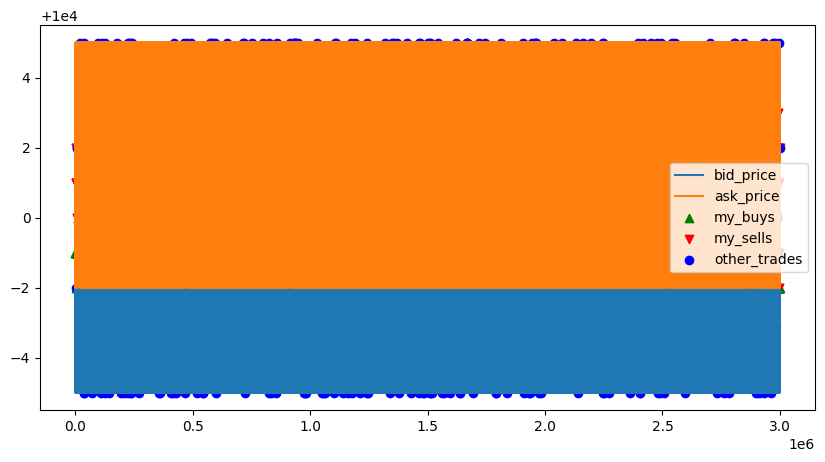

In [32]:
# Here matplotlib qt is used for displaying graphs in different windows, etc. If you want to disable it, hash it above
# Load and filter the trades data
trades = pd.read_csv('data/trades.csv', index_col='timestamp')
trades = trades[trades['symbol'] == instrument]

my_buys = trades[trades['buyer'] == 'SUBMISSION']
my_sells = trades[trades['seller'] == 'SUBMISSION']
other_trades = trades[(trades['buyer'] != 'SUBMISSION') & (trades['seller'] != 'SUBMISSION')]

plt.figure(figsize=(10, 5))
plt.plot(ob['bid_price_1'], label='bid_price')
plt.plot(ob['ask_price_1'], label='ask_price')
plt.scatter(my_buys.index, my_buys['price'], label='my_buys', color='green', marker='^')
plt.scatter(my_sells.index, my_sells['price'], label='my_sells', color='red', marker='v')
plt.scatter(other_trades.index, other_trades['price'], label='other_trades', color='blue', marker='o')
plt.legend()
plt.show()

In [33]:
# Load and filter the trades data
trades = pd.read_csv('data/trades.csv', index_col='timestamp')
trades = trades[trades['symbol'] == instrument]

my_buys = trades[trades['buyer'] == 'SUBMISSION']
my_sells = trades[trades['seller'] == 'SUBMISSION']
other_trades = trades[(trades['buyer'] != 'SUBMISSION') & (trades['seller'] != 'SUBMISSION')]


In [34]:
# here you can see how I calculated the mid. In general it is best to use VWAP (volume-weighted average price), so you also level 2 data, but you can decide whatever
ob["mid"] = (ob["bid_price_1"] + ob["ask_price_1"])/2
ob["mid_lev2"]= (ob["bid_price_2"] + ob["ask_price_2"])/2
ob["weighted_mid"]= (ob["bid_price_1"] * ob["bid_volume_1"] + ob["ask_price_1"] * ob["ask_volume_1"])/ (ob["bid_volume_1"]+ob["ask_volume_1"])

ob["mid_fv_divergance"] = ob["mid_lev2"] - ob["mid"]

In [35]:
AMday0 = ob.query("day == 0")
AMday1 = ob.query("day == -1")
AMday2 = ob.query("day == -2")

In [36]:
AMday0["spread"] = AMday0["bid_price_1"] - AMday0["ask_price_1"]
AMday1["spread"] = AMday1["bid_price_1"] - AMday1["ask_price_1"]
AMday2["spread"] = AMday2["bid_price_1"] - AMday2["ask_price_1"]

C:\Users\corin\AppData\Local\Temp\ipykernel_27824\1463698232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMday0["spread"] = AMday0["bid_price_1"] - AMday0["ask_price_1"]
C:\Users\corin\AppData\Local\Temp\ipykernel_27824\1463698232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMday1["spread"] = AMday1["bid_price_1"] - AMday1["ask_price_1"]
C:\Users\corin\AppData\Local\Temp\ipykernel_27824\1463698232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram